## Vueling Tech Hack - Data-Science.

#### Este proyecto está construido dentro del marco de las competiciones de Nuwe, organizada por la compañía aérea Vueling y la IT Academy, en el apartado de Ciencia de Datos.
https://nuwe.io/dev/competitions/vueling-tech-hack/dashboard-datascience-challenge
#### El reto de este hackaton consiste en obtener la mejor métrica F1 macro sobre un conjunto de datos que recoge un histórico de rutas de la compañía.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_flights = pd.read_csv('C:/IT Academy/Hackton Vueling/train_NEW.csv')

In [3]:
df_flights

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,Jul 2009,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137"
1,Apr 2008,Lebanon,Middle East,9,Europe,5,760,"2,389,940"
2,Apr 2005,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450"
3,Aug 2016,Israel,Middle East,19,Europe,117,"23,366","61,557,637"
4,Feb 2019,Albania,Europe,8,Europe,80,"12,854","9,837,347"
...,...,...,...,...,...,...,...,...
276977,Jul 2012,Iraq,Middle East,21,Europe,4,744,"2,635,372"
276978,Jun 2007,Cyprus,Europe,4,Europe,64,"9,519","19,409,611"
276979,Sep 2007,Panama,Central America,17,North America,442,"63,061","161,243,990"
276980,Nov 2015,Russian Federation,Europe,9,Europe,90,"13,422","30,147,391"


#### Descripción de los atributos.
Nuestro dataset es una recopilación de datos de rutas aéreas con las siguientes variables:
-  Date: Flight date.
-  Origin_Country : Country of origin.
-  Origin_Continent : Continent of origin.
-  Destination_Country: Country of destination.
-  Destination_Continent: Destination continent.
-  Total_flights: Total number of flights.
-  Total_seats: Total number of seats.
-  Total_ASKs: (Available Seat Kilometer). Target variable. Total seat numbers available by the total number of km these seats have flown.

In [4]:
df_flights.shape

(276982, 8)

In [5]:
df_flights.dtypes

Date                     object
Origin Country           object
Origin Continent         object
Destination Country       int64
Destination Continent    object
Total flights            object
Total seats              object
Total ASKs               object
dtype: object

In [6]:
df_flights.isnull().sum()

Date                     0
Origin Country           0
Origin Continent         0
Destination Country      0
Destination Continent    0
Total flights            0
Total seats              0
Total ASKs               0
dtype: int64

In [7]:
df_flights.isna().sum()

Date                     0
Origin Country           0
Origin Continent         0
Destination Country      0
Destination Continent    0
Total flights            0
Total seats              0
Total ASKs               0
dtype: int64

In [8]:
df_flights.duplicated().sum()

0

#### Descrición de la base de datos.
Nuestro dataset recoge un histórico de las rutas aéreas de la compañía Vueling. Es una base de datos estructurada relacional con 276982 registros y 8 variables. Tenemos una variable numérica nominal, Destination Country, una categórica temporal, Date, tres variables categóricas nominales y tres categóricas ordinales.

#### Variable objetivo Destination Country.

Añadimos una columna de Destination Country con los nombre de las ciudades.

In [9]:
countries_dest = {"China": 0, "India": 1, "Russian Federation": 2, "United Arab Emirates": 3, "Austria": 4, "Germany": 5, "Greece": 6, "Italy": 7, "Turkey": 8, "Belgium": 9, "Egypt": 10, "France": 11, "Morocco": 12, "Spain": 13, "Switzerland": 14, "United Kingdom": 15, "South Africa": 16, "United States": 17, "Canada": 18, "Czech Republic": 19, "Ukraine": 20, "Netherlands": 21, "Thailand": 22, "Denmark": 23, "Qatar": 24}
print(countries_dest.items())

dict_items([('China', 0), ('India', 1), ('Russian Federation', 2), ('United Arab Emirates', 3), ('Austria', 4), ('Germany', 5), ('Greece', 6), ('Italy', 7), ('Turkey', 8), ('Belgium', 9), ('Egypt', 10), ('France', 11), ('Morocco', 12), ('Spain', 13), ('Switzerland', 14), ('United Kingdom', 15), ('South Africa', 16), ('United States', 17), ('Canada', 18), ('Czech Republic', 19), ('Ukraine', 20), ('Netherlands', 21), ('Thailand', 22), ('Denmark', 23), ('Qatar', 24)])


In [10]:
dict_countries = {v: k for k, v in countries_dest.items()}
print(dict_countries)

{0: 'China', 1: 'India', 2: 'Russian Federation', 3: 'United Arab Emirates', 4: 'Austria', 5: 'Germany', 6: 'Greece', 7: 'Italy', 8: 'Turkey', 9: 'Belgium', 10: 'Egypt', 11: 'France', 12: 'Morocco', 13: 'Spain', 14: 'Switzerland', 15: 'United Kingdom', 16: 'South Africa', 17: 'United States', 18: 'Canada', 19: 'Czech Republic', 20: 'Ukraine', 21: 'Netherlands', 22: 'Thailand', 23: 'Denmark', 24: 'Qatar'}


In [11]:
df_flights['Destination Country Map'] = df_flights['Destination Country'].map(dict_countries)

In [12]:
df_flights

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs,Destination Country Map
0,Jul 2009,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137",Spain
1,Apr 2008,Lebanon,Middle East,9,Europe,5,760,"2,389,940",Belgium
2,Apr 2005,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450",France
3,Aug 2016,Israel,Middle East,19,Europe,117,"23,366","61,557,637",Czech Republic
4,Feb 2019,Albania,Europe,8,Europe,80,"12,854","9,837,347",Turkey
...,...,...,...,...,...,...,...,...,...
276977,Jul 2012,Iraq,Middle East,21,Europe,4,744,"2,635,372",Netherlands
276978,Jun 2007,Cyprus,Europe,4,Europe,64,"9,519","19,409,611",Austria
276979,Sep 2007,Panama,Central America,17,North America,442,"63,061","161,243,990",United States
276980,Nov 2015,Russian Federation,Europe,9,Europe,90,"13,422","30,147,391",Belgium


In [13]:
df_destination = df_flights.groupby(by='Destination Country Map')

In [14]:
df_destination.ngroups

25

In [15]:
df_destination.size().sort_values()

Destination Country Map
Czech Republic           7217
South Africa             7357
Greece                   7390
Morocco                  7408
Ukraine                  7559
Denmark                  7624
India                    8306
Egypt                    8344
Thailand                 9040
Qatar                    9197
Canada                   9756
Switzerland              9771
Belgium                  9783
China                   10020
Austria                 10371
Spain                   11572
Italy                   13332
Netherlands             13362
United Arab Emirates    13678
Turkey                  14210
Russian Federation      15559
Germany                 15883
United States           16063
United Kingdom          16118
France                  18062
dtype: int64

#### Nuestra variable objetivo puede tener 25 valores diferentes. Nuestro modelo será de clasificación multiclase con las clases desbalanceadas.

#### Algunos datos sobre nuestro dataset.

Número de vuelos por continente de destino.

In [16]:
df_flights['Destination Continent'].value_counts().sort_values()

Middle East       22875
Africa            23109
North America     25819
Asia              31562
Europe           173617
Name: Destination Continent, dtype: int64

Número de vuelos por ciudad de destino.

In [17]:
df_flights.groupby(by='Destination Continent')['Destination Country Map'].value_counts()

Destination Continent  Destination Country Map
Africa                 Egypt                       8344
                       Morocco                     7408
                       South Africa                7357
Asia                   China                      10020
                       Thailand                    9040
                       India                       8306
                       Russian Federation          4196
Europe                 France                     18062
                       United Kingdom             16118
                       Germany                    15883
                       Turkey                     14210
                       Netherlands                13362
                       Italy                      13332
                       Spain                      11572
                       Russian Federation         11363
                       Austria                    10371
                       Belgium                     9783
 

Número de vuelos de ciudad a ciudad.

In [18]:
df_pivot = pd.pivot_table(df_flights,index=['Origin Country'],columns=['Destination Country Map'],values=['Total flights'],aggfunc='count')
df_pivot

Total flights                                       \
Destination Country Map       Austria Belgium Canada  China Czech Republic   
Origin Country                                                               
Afghanistan                       3.0     NaN    NaN  130.0            NaN   
Albania                         162.0   107.0    NaN    NaN           30.0   
Algeria                          61.0   156.0  132.0  116.0            1.0   
Angola                            NaN    11.0    NaN   56.0            NaN   
Anguilla                          NaN     NaN    NaN    NaN            NaN   
...                               ...     ...    ...    ...            ...   
Western Sahara                    NaN     NaN    NaN    NaN            NaN   
Western Samoa                     NaN     NaN    NaN    NaN            NaN   
Yemen                             NaN     NaN    NaN    NaN            NaN   
Zambia                            NaN     NaN    NaN    NaN            NaN   
Zimbabwe                          NaN     NaN    NaN    NaN            NaN   

                                                              ...  \
Destination Country Map Denmark  Egypt France Germany Greece  ...   
Origin Country                                                ...   
Afghanistan                 NaN    NaN    NaN    36.0    NaN  ...   
Albania                     3.0    4.0   54.0   155.0  153.0  ...   
Algeria                     NaN  159.0  162.0   150.0    NaN  ...   
Angola                      NaN    2.0  151.0   115.0    NaN  ...   
Anguilla                    NaN    NaN    NaN     NaN    NaN  ...   
...                         ...    ...    ...     ...    ...  ...   
Western Sahara              NaN    NaN   18.0     NaN    NaN  ...   
Western Samoa               NaN    NaN    NaN     NaN    NaN  ...   
Yemen                       NaN  119.0   60.0    46.0    NaN  ...   
Zambia                      NaN    2.0    NaN     NaN    NaN  ...   
Zimbabwe                    NaN    NaN    NaN     NaN    NaN  ...   

                                                                            \
Destination Country Map Russian Federation South Africa  Spain Switzerland   
Origin Country                                                               
Afghanistan                          108.0          NaN    NaN         NaN   
Albania                                NaN          NaN    7.0        65.0   
Algeria                              139.0          NaN  155.0       148.0   
Angola                                47.0        166.0   43.0         NaN   
Anguilla                               NaN          NaN    NaN         NaN   
...                                    ...          ...    ...         ...   
Western Sahara                         NaN          NaN  163.0         NaN   
Western Samoa                          NaN          NaN    NaN         NaN   
Yemen                                  NaN         18.0    NaN         NaN   
Zambia                                22.0        161.0    NaN         NaN   
Zimbabwe                               NaN        166.0    NaN         NaN   

                                                                      \
Destination Country Map Thailand Turkey Ukraine United Arab Emirates   
Origin Country                                                         
Afghanistan                  NaN  138.0     NaN                165.0   
Albania                      NaN  167.0    10.0                  4.0   
Algeria                      NaN  166.0     NaN                149.0   
Angola                       NaN    NaN     NaN                138.0   
Anguilla                     NaN    NaN     NaN                  NaN   
...                          ...    ...     ...                  ...   
Western Sahara               NaN    NaN     NaN                  NaN   
Western Samoa                NaN    NaN     NaN                  NaN   
Yemen                        NaN   95.0     NaN                 99.0   
Zambia 

Número de vuelos por destino.

In [19]:
df_pivot2 = pd.pivot_table(df_flights,index=['Destination Country Map'],columns=['Destination Continent'],values=['Total flights'],aggfunc='count')
df_pivot2

Total flights                                \
Destination Continent          Africa     Asia   Europe Middle East   
Destination Country Map                                               
Austria                           NaN      NaN  10371.0         NaN   
Belgium                           NaN      NaN   9783.0         NaN   
Canada                            NaN      NaN      NaN         NaN   
China                             NaN  10020.0      NaN         NaN   
Czech Republic                    NaN      NaN   7217.0         NaN   
Denmark                           NaN      NaN   7624.0         NaN   
Egypt                          8344.0      NaN      NaN         NaN   
France                            NaN      NaN  18062.0         NaN   
Germany                           NaN      NaN  15883.0         NaN   
Greece                            NaN      NaN   7390.0         NaN   
India                             NaN   8306.0      NaN         NaN   
Italy                             NaN      NaN  13332.0         NaN   
Morocco                        7408.0      NaN      NaN         NaN   
Netherlands                       NaN      NaN  13362.0         NaN   
Qatar                             NaN      NaN      NaN      9197.0   
Russian Federation                NaN   4196.0  11363.0         NaN   
South Africa                   7357.0      NaN      NaN         NaN   
Spain                             NaN      NaN  11572.0         NaN   
Switzerland                       NaN      NaN   9771.0         NaN   
Thailand                          NaN   9040.0      NaN         NaN   
Turkey                            NaN      NaN  14210.0         NaN   
Ukraine                           NaN      NaN   7559.0         NaN   
United Arab Emirates              NaN      NaN      NaN     13678.0   
United Kingdom                    NaN      NaN  16118.0         NaN   
United States                     NaN      NaN      NaN         NaN   

                                       
Destination Continent   North America  
Destination Country Map                
Austria                           NaN  
Belgium                           NaN  
Canada                         9756.0  
China                             NaN  
Czech Republic                    NaN  
Denmark                           NaN  
Egypt                             NaN  
France                            NaN  
Germany                           NaN  
Greece                            NaN  
India                             NaN  
Italy                             NaN  
Morocco                           NaN  
Netherlands                       NaN  
Qatar                             NaN  
Russian Federation                NaN  
South Africa                      NaN  
Spain                             NaN  
Switzerland                       NaN  
Thailand                          NaN  
Turkey                            NaN  
Ukraine                           NaN  
United Arab Emirates              NaN  
United Kingdom                    NaN  
United States                 16063.0

### Preprocesado.

#### Variable categóricas nominal Origin Country.
Transformamos esta variable en una numérica con map.

In [20]:
# número de valores de lavariable
df_flights['Origin Country'].nunique()

214

In [21]:
# hacemos una lista con los valores
countries = list(df_flights['Origin Country'].unique())

In [22]:
countries

['United Kingdom',
 'Lebanon',
 'Switzerland',
 'Israel',
 'Albania',
 'Martinique',
 'Ireland',
 'Turkey',
 'Italy',
 'Nepal',
 'Dominican Republic',
 'Portugal',
 'Qatar',
 'Mexico',
 'Cuba',
 'Greece',
 'India',
 'Norway',
 'Denmark',
 'Luxembourg',
 'Singapore',
 'Jordan',
 'Senegal',
 'Kenya',
 'Morocco',
 'Brazil',
 'Tajikistan',
 'Azerbaijan',
 'South Korea',
 'Germany',
 'Austria',
 'Malta',
 'Moldova',
 'Ethiopia',
 'Georgia',
 'United States',
 'Canada',
 'Maldives',
 'Kuwait',
 'Belarus',
 'Sweden',
 'Estonia',
 'Djibouti',
 'Togo',
 'Aruba',
 'Bosnia and Herzegovina',
 'Brunei Darussalam',
 'Iran',
 'Tunisia',
 'Bahrain',
 'El Salvador',
 'Spain',
 'Netherlands',
 'Saudi Arabia',
 'Czech Republic',
 'Bolivia',
 'Belgium',
 'Russian Federation',
 'Hong Kong (SAR)',
 'Macedonia',
 'Slovenia',
 'Armenia',
 'Saint Lucia',
 'Cyprus',
 'Finland',
 'Trinidad and Tobago',
 'Tanzania',
 'Uzbekistan',
 'Croatia',
 'Thailand',
 'Iraq',
 'Slovakia',
 'Hungary',
 'Bonaire, Saint Eustati

In [23]:
# hacemos un diccionario con los valores de las ciudades de destino facilitado como información
countries_dest = {"China": 0, "India": 1, "Russian Federation": 2, "United Arab Emirates": 3, "Austria": 4, "Germany": 5, "Greece": 6, "Italy": 7, "Turkey": 8, "Belgium": 9, "Egypt": 10, "France": 11, "Morocco": 12, "Spain": 13, "Switzerland": 14, "United Kingdom": 15, "South Africa": 16, "United States": 17, "Canada": 18, "Czech Republic": 19, "Ukraine": 20, "Netherlands": 21, "Thailand": 22, "Denmark": 23, "Qatar": 24}

In [24]:
# pasamos a una lista las claves del diccionario anterior
countries_list = [*countries_dest]

In [25]:
countries_list

['China',
 'India',
 'Russian Federation',
 'United Arab Emirates',
 'Austria',
 'Germany',
 'Greece',
 'Italy',
 'Turkey',
 'Belgium',
 'Egypt',
 'France',
 'Morocco',
 'Spain',
 'Switzerland',
 'United Kingdom',
 'South Africa',
 'United States',
 'Canada',
 'Czech Republic',
 'Ukraine',
 'Netherlands',
 'Thailand',
 'Denmark',
 'Qatar']

In [26]:
# borramos de la lista inicial los valores de la lista de ciudades de destino destino
for i in countries_list: countries.remove(i)

In [27]:
# tenemmos una lista de las ciudades de origen que no coinciden con las ciudades de destino
countries

['Lebanon',
 'Israel',
 'Albania',
 'Martinique',
 'Ireland',
 'Nepal',
 'Dominican Republic',
 'Portugal',
 'Mexico',
 'Cuba',
 'Norway',
 'Luxembourg',
 'Singapore',
 'Jordan',
 'Senegal',
 'Kenya',
 'Brazil',
 'Tajikistan',
 'Azerbaijan',
 'South Korea',
 'Malta',
 'Moldova',
 'Ethiopia',
 'Georgia',
 'Maldives',
 'Kuwait',
 'Belarus',
 'Sweden',
 'Estonia',
 'Djibouti',
 'Togo',
 'Aruba',
 'Bosnia and Herzegovina',
 'Brunei Darussalam',
 'Iran',
 'Tunisia',
 'Bahrain',
 'El Salvador',
 'Saudi Arabia',
 'Bolivia',
 'Hong Kong (SAR)',
 'Macedonia',
 'Slovenia',
 'Armenia',
 'Saint Lucia',
 'Cyprus',
 'Finland',
 'Trinidad and Tobago',
 'Tanzania',
 'Uzbekistan',
 'Croatia',
 'Iraq',
 'Slovakia',
 'Hungary',
 'Bonaire, Saint Eustatius & Saba',
 'Sudan',
 'Taiwan',
 'Serbia',
 'Japan',
 'Namibia',
 'Haiti',
 'Vietnam',
 'Fiji',
 'Nigeria',
 'Sint Maarten',
 'Seychelles',
 'Myanmar',
 'Romania',
 'Niger',
 'Suriname',
 'Kazakhstan',
 'Cape Verde',
 'Gambia',
 'Poland',
 'Uruguay',
 'Mal

In [28]:
# hacemos un diccionario con la lista de las ciudades de destino, empezando en 25 para no repetir valores entre listas
countries_dict = {}
for count, value in enumerate(countries, start=25): countries_dict[value]=count

In [29]:
countries_dict

{'Lebanon': 25,
 'Israel': 26,
 'Albania': 27,
 'Martinique': 28,
 'Ireland': 29,
 'Nepal': 30,
 'Dominican Republic': 31,
 'Portugal': 32,
 'Mexico': 33,
 'Cuba': 34,
 'Norway': 35,
 'Luxembourg': 36,
 'Singapore': 37,
 'Jordan': 38,
 'Senegal': 39,
 'Kenya': 40,
 'Brazil': 41,
 'Tajikistan': 42,
 'Azerbaijan': 43,
 'South Korea': 44,
 'Malta': 45,
 'Moldova': 46,
 'Ethiopia': 47,
 'Georgia': 48,
 'Maldives': 49,
 'Kuwait': 50,
 'Belarus': 51,
 'Sweden': 52,
 'Estonia': 53,
 'Djibouti': 54,
 'Togo': 55,
 'Aruba': 56,
 'Bosnia and Herzegovina': 57,
 'Brunei Darussalam': 58,
 'Iran': 59,
 'Tunisia': 60,
 'Bahrain': 61,
 'El Salvador': 62,
 'Saudi Arabia': 63,
 'Bolivia': 64,
 'Hong Kong (SAR)': 65,
 'Macedonia': 66,
 'Slovenia': 67,
 'Armenia': 68,
 'Saint Lucia': 69,
 'Cyprus': 70,
 'Finland': 71,
 'Trinidad and Tobago': 72,
 'Tanzania': 73,
 'Uzbekistan': 74,
 'Croatia': 75,
 'Iraq': 76,
 'Slovakia': 77,
 'Hungary': 78,
 'Bonaire, Saint Eustatius & Saba': 79,
 'Sudan': 80,
 'Taiwan': 

In [30]:
# unimos los dos diccionarios
countries_dest.update(countries_dict)

In [31]:
countries_dest

{'China': 0,
 'India': 1,
 'Russian Federation': 2,
 'United Arab Emirates': 3,
 'Austria': 4,
 'Germany': 5,
 'Greece': 6,
 'Italy': 7,
 'Turkey': 8,
 'Belgium': 9,
 'Egypt': 10,
 'France': 11,
 'Morocco': 12,
 'Spain': 13,
 'Switzerland': 14,
 'United Kingdom': 15,
 'South Africa': 16,
 'United States': 17,
 'Canada': 18,
 'Czech Republic': 19,
 'Ukraine': 20,
 'Netherlands': 21,
 'Thailand': 22,
 'Denmark': 23,
 'Qatar': 24,
 'Lebanon': 25,
 'Israel': 26,
 'Albania': 27,
 'Martinique': 28,
 'Ireland': 29,
 'Nepal': 30,
 'Dominican Republic': 31,
 'Portugal': 32,
 'Mexico': 33,
 'Cuba': 34,
 'Norway': 35,
 'Luxembourg': 36,
 'Singapore': 37,
 'Jordan': 38,
 'Senegal': 39,
 'Kenya': 40,
 'Brazil': 41,
 'Tajikistan': 42,
 'Azerbaijan': 43,
 'South Korea': 44,
 'Malta': 45,
 'Moldova': 46,
 'Ethiopia': 47,
 'Georgia': 48,
 'Maldives': 49,
 'Kuwait': 50,
 'Belarus': 51,
 'Sweden': 52,
 'Estonia': 53,
 'Djibouti': 54,
 'Togo': 55,
 'Aruba': 56,
 'Bosnia and Herzegovina': 57,
 'Brunei Daru

In [32]:
# pasamos la variable categórica a numérica con map
df_flights['Origin Country Map'] = df_flights['Origin Country'].map(countries_dest)

#### Variable categórica Origin Continent y Destination Continent.
Transformamos estas variables a numéricas con OneHotEncoder.

In [33]:
df_flights['Destination Continent'].unique()

array(['Europe', 'North America', 'Asia', 'Middle East', 'Africa'],
      dtype=object)

In [34]:
df_flights['Origin Continent'].unique()

array(['Europe', 'Middle East', 'Caribbean', 'Asia', 'North America',
       'Africa', 'South America', 'Central America', 'Australasia'],
      dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_flights[['Origin Continent']]).toarray(), columns=('Or_C_1', 'Or_C_2', 'Or_C_3', 'Or_C_4', 'Or_C_5', 'Or_C_6', 'Or_C_7', 'Or_C_8', 'Or_C_9'))

In [36]:
enc_df

,Or_C_1,Or_C_2,Or_C_3,Or_C_4,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
276977,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276978,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
enc_df2 = pd.DataFrame(enc.fit_transform(df_flights[['Destination Continent']]).toarray(), columns = ('Dest_C_1', 'Dest_C_2', 'Dest_C_3', 'Dest_C_4', 'Dest_C_5'))

In [38]:
enc_df2

,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
276977,0.0,0.0,1.0,0.0,0.0
276978,0.0,0.0,1.0,0.0,0.0
276979,0.0,0.0,0.0,0.0,1.0
276980,0.0,0.0,1.0,0.0,0.0


In [39]:
# unimos los dos dataframes
enc_df = enc_df.join(enc_df2)
enc_df

,Or_C_1,Or_C_2,Or_C_3,Or_C_4,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276977,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276978,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276979,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
276980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# unimos el dataframe anterior con el primcipal
df_flights = pd.concat([df_flights, enc_df], axis=1)
df_flights

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs,Destination Country Map,Origin Country Map,...,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,Jul 2009,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137",Spain,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Apr 2008,Lebanon,Middle East,9,Europe,5,760,"2,389,940",Belgium,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Apr 2005,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450",France,14,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Aug 2016,Israel,Middle East,19,Europe,117,"23,366","61,557,637",Czech Republic,26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Feb 2019,Albania,Europe,8,Europe,80,"12,854","9,837,347",Turkey,27,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276977,Jul 2012,Iraq,Middle East,21,Europe,4,744,"2,635,372",Netherlands,76,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276978,Jun 2007,Cyprus,Europe,4,Europe,64,"9,519","19,409,611",Austria,70,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276979,Sep 2007,Panama,Central America,17,North America,442,"63,061","161,243,990",United States,177,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
276980,Nov 2015,Russian Federation,Europe,9,Europe,90,"13,422","30,147,391",Belgium,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Variable categórica temporal a temporal.
Transformamos la variable a temporal con to_datetime, la ponemos como índice y extraemos dos columnas numéricas de mes y año.

In [41]:
df_flights['Date'][0]

'Jul 2009'

In [42]:
df_flights['Date'] = pd.to_datetime(df_flights['Date'], format='%b %Y')

In [43]:
df_flights['Date'][0]

Timestamp('2009-07-01 00:00:00')

In [44]:
df_flights = df_flights.set_index('Date')

In [45]:
df_flights['Year'] = df_flights.index.year                                
df_flights['Month'] = df_flights.index.month                                

In [46]:
df_flights

,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs,Destination Country Map,Origin Country Map,Or_C_1,...,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2009-07-01,United Kingdom,Europe,13,Europe,"9,032","1,531,683","2,447,559,137",Spain,15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009,7
2008-04-01,Lebanon,Middle East,9,Europe,5,760,"2,389,940",Belgium,25,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2008,4
2005-04-01,Switzerland,Europe,11,Europe,"1,471","158,661","66,533,450",France,14,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2005,4
2016-08-01,Israel,Middle East,19,Europe,117,"23,366","61,557,637",Czech Republic,26,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016,8
2019-02-01,Albania,Europe,8,Europe,80,"12,854","9,837,347",Turkey,27,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-01,Iraq,Middle East,21,Europe,4,744,"2,635,372",Netherlands,76,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012,7
2007-06-01,Cyprus,Europe,4,Europe,64,"9,519","19,409,611",Austria,70,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2007,6
2007-09-01,Panama,Central America,17,North America,442,"63,061","161,243,990",United States,177,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007,9


#### Variable categóricas ordinales.
Transformamos estas variables a numéricas con astype(), eliminando previamente las comas.

In [47]:
df_flights['Total flights'] = list(map(lambda x: x.replace(',',''),df_flights['Total flights']))
df_flights['Total seats'] = list(map(lambda x: x.replace(',',''),df_flights['Total seats']))
df_flights['Total ASKs'] = list(map(lambda x: x.replace(',',''),df_flights['Total ASKs']))

In [48]:
df_flights['Total flights'] = df_flights['Total flights'].astype('int64', errors = 'ignore')
df_flights['Total seats'] = df_flights['Total seats'].astype('int64', errors = 'ignore')
df_flights['Total ASKs'] = df_flights['Total ASKs'].astype('int64', errors = 'ignore')

#### Tenemos el dataset preparado para montar nuestro modelo.

In [49]:
df_flights.dtypes

Origin Country              object
Origin Continent            object
Destination Country          int64
Destination Continent       object
Total flights                int64
Total seats                  int64
Total ASKs                   int64
Destination Country Map     object
Origin Country Map           int64
Or_C_1                     float64
Or_C_2                     float64
Or_C_3                     float64
Or_C_4                     float64
Or_C_5                     float64
Or_C_6                     float64
Or_C_7                     float64
Or_C_8                     float64
Or_C_9                     float64
Dest_C_1                   float64
Dest_C_2                   float64
Dest_C_3                   float64
Dest_C_4                   float64
Dest_C_5                   float64
Year                         int64
Month                        int64
dtype: object

#### Matriz de correlación.
Queremos saber si hay alguna correlacion entre variables.

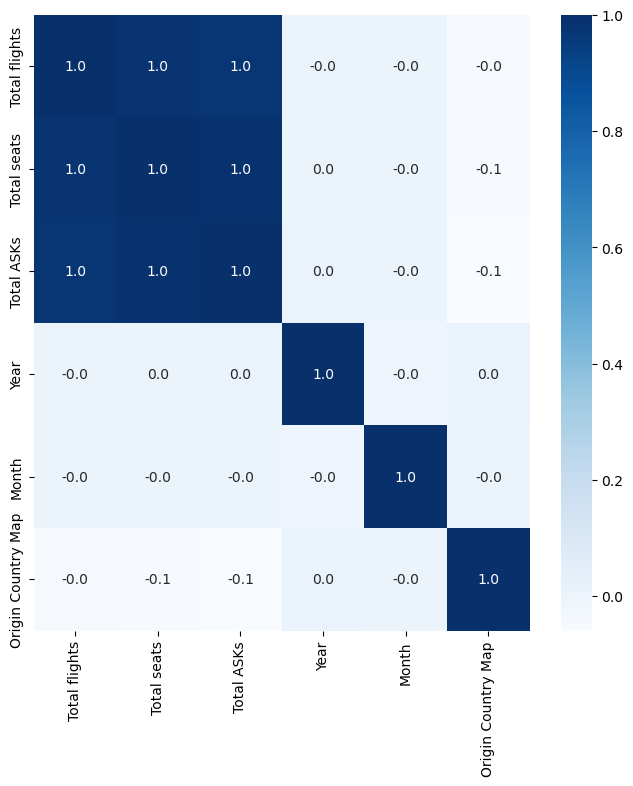

In [50]:
# vemos la matriz de correlación
col_corr = ['Total flights', 'Total seats', 'Total ASKs',
       'Year', 'Month', 'Origin Country Map']
correlation_matrix = df_flights[col_corr].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues');

#### Total flights, Total seats y Total ASKs están áltamente correlacionados.

#### Definimos nuestra variable objetivo.

In [51]:
y = df_flights['Destination Country']

#### Creamos un dataset con nuestras variables independientes.

In [52]:
X = df_flights.drop(['Destination Country', 'Destination Country Map', 'Destination Continent','Origin Country','Origin Continent', 'Total seats', 'Total flights'], axis=1)

In [53]:
X

,Total ASKs,Origin Country Map,Or_C_1,Or_C_2,Or_C_3,Or_C_4,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5,Year,Month
Date,,,,,,,,,,,,,,,,,,
2009-07-01,2447559137,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2009,7
2008-04-01,2389940,25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2008,4
2005-04-01,66533450,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2005,4
2016-08-01,61557637,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2016,8
2019-02-01,9837347,27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-01,2635372,76,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012,7
2007-06-01,19409611,70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2007,6
2007-09-01,161243990,177,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007,9


#### Análisis de la distribución y los outliers.
Tomamos una muestra del dataset para este estudio.

In [54]:
X_sample = X.sample(10000).copy()

In [55]:
X_sample.columns

Index(['Total ASKs', 'Origin Country Map', 'Or_C_1', 'Or_C_2', 'Or_C_3',
       'Or_C_4', 'Or_C_5', 'Or_C_6', 'Or_C_7', 'Or_C_8', 'Or_C_9', 'Dest_C_1',
       'Dest_C_2', 'Dest_C_3', 'Dest_C_4', 'Dest_C_5', 'Year', 'Month'],
      dtype='object')

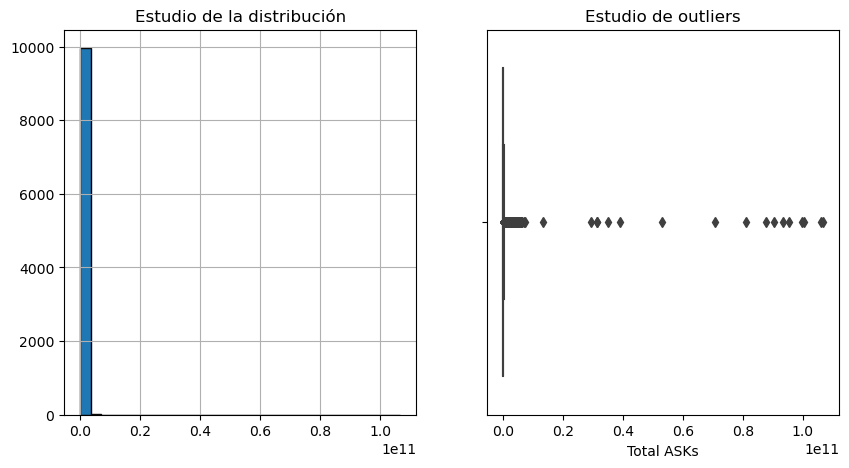

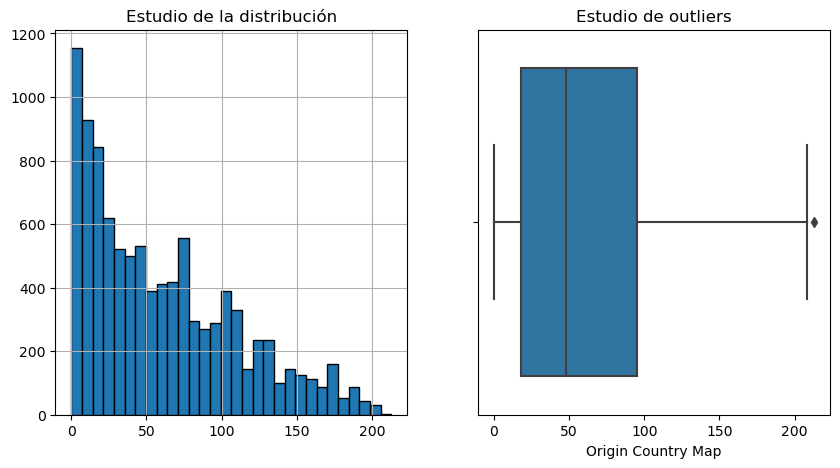

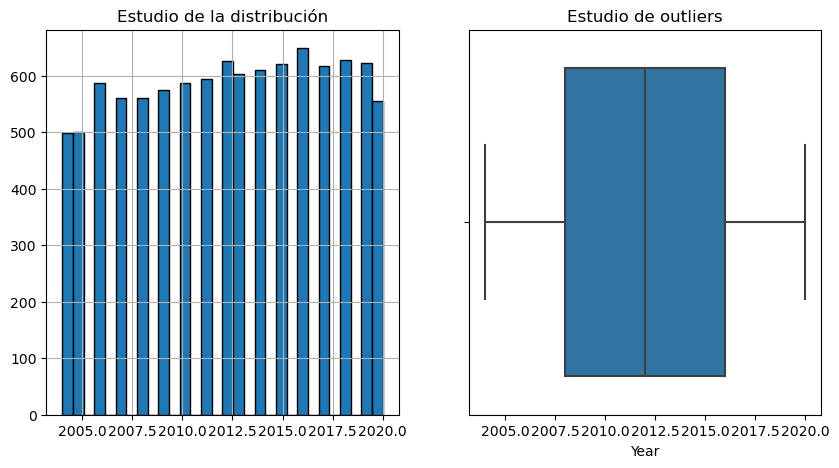

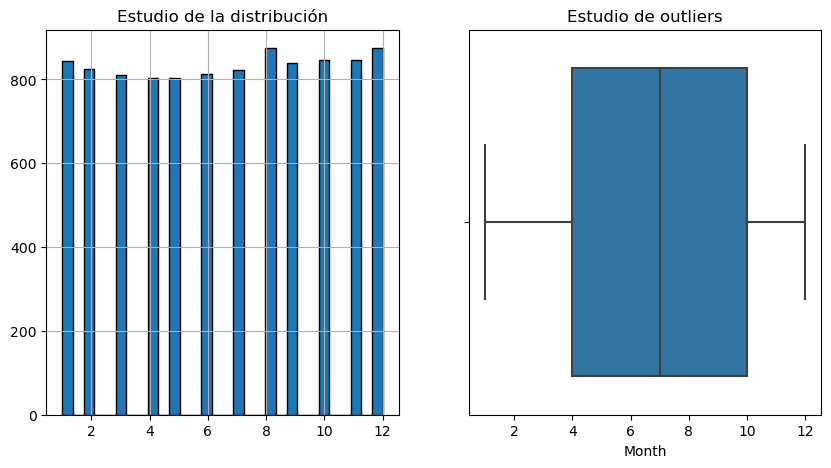

In [56]:
columns = ['Total ASKs', 'Origin Country Map', 'Year', 'Month']
for colum in columns: 
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    X_sample[colum].hist(bins=30,edgecolor='black')
    plt.title('Estudio de la distribución')
    plt.subplot(1,2,2)
    sns.boxplot(x = X_sample[colum])
    plt.title('Estudio de outliers')

#### Analisis de la normalidad.
Planteamos las hipótesis:

Hipótesis nula H0, nuestra muestra tiene una distribución normal. Hipótesis H1, nuestra muestra no tiene una distribución normal. Para validar nuestra hipótesis utilizamos el Test de distribución gaussiana Shapiro-Wilk con un alpha del 5%.

In [57]:
# definimos una función que nos devuelva el resultado del Test de Shapiro-Wilk
from scipy.stats import shapiro
def distribucion_normal(data):
    stat, p = shapiro(data)
    print('stat=%.3f, p-value=%.20f' % (stat, p))
    if p > 0.05:
        print('Aceptamos la hipótesis nula H0: Probablemente Gaussiana')
    else:
        print('Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana')

In [58]:
i=0
for column in columns:
    print('Variable', columns[i])
    distribucion_normal(X[column])
    print('')
    i+=1;

Variable Total ASKs
stat=0.039, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana

Variable Origin Country Map
stat=0.915, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana

Variable Year
stat=0.947, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana

Variable Month
stat=0.943, p-value=0.00000000000000000000
Rechazamos la hipótesis nula H0, nos quedamos con la alternativa H1: Probablemente no Gaussiana



Para normalidad las variables con distribución no Gaussiana hacemos un MinMaxScaler.

In [59]:
from sklearn.preprocessing import MinMaxScaler
variablesNorm = ['Origin Country Map', 'Year', 'Month']
mms = MinMaxScaler(feature_range = (0, 1))
X[variablesNorm] = mms.fit_transform(X[variablesNorm])

Para las variables con outliers hacemos un RobusScaler.

In [60]:
from sklearn.preprocessing import RobustScaler
variablesRbSc = ['Total ASKs']
rs = RobustScaler()
X[variablesRbSc] = rs.fit_transform(X[variablesRbSc])

#### División del dataset en Train y Test.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(193887, 18) (83095, 18) (193887,) (83095,)


#### Modelo DecisionTreeClassifier.

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)

0.7070461519947049

In [63]:
y_pred_DT = dt_classifier.predict(X_test)

#### Confusion matrix.

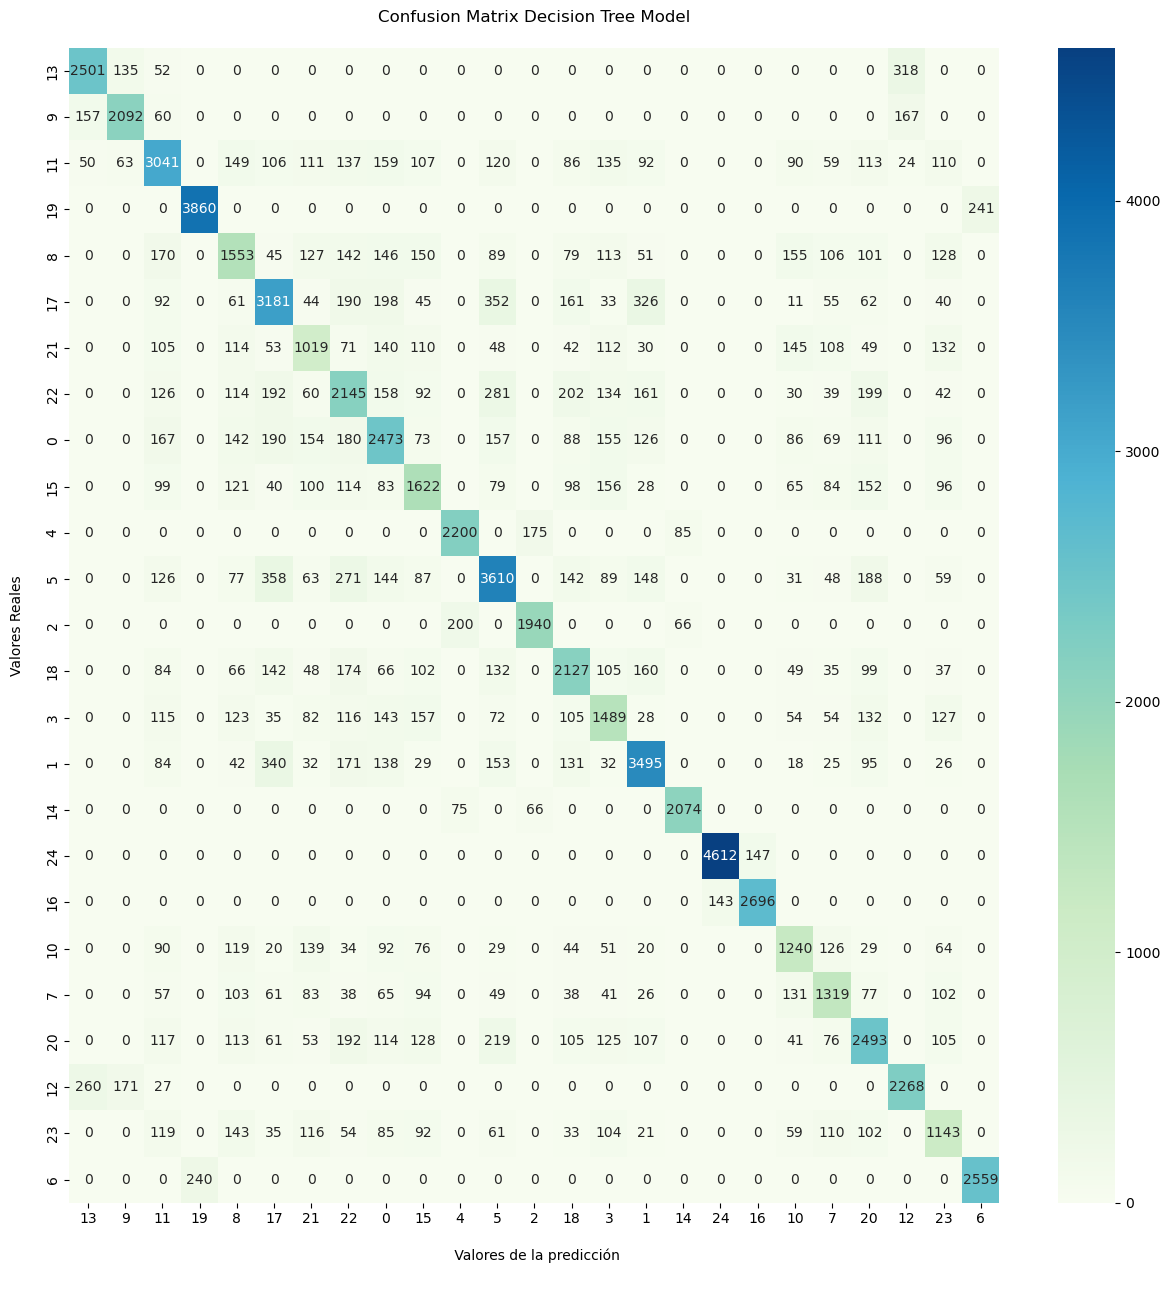

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(15,15))
clases = [13,  9, 11, 19,  8, 17, 21, 22,  0, 15,  4,  5,  2, 18,  3,  1, 14,
       24, 16, 10,  7, 20, 12, 23,  6]

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT), columns=clases, index = clases)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusion Matrix Decision Tree Model\n')
fx.set_xlabel('\n Valores de la predicción\n')
fx.set_ylabel('Valores Reales\n');

#### Otras métricas.

In [65]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_pred_DT)
precision=metrics.precision_score(y_test, y_pred_DT, average='macro')
recall=metrics.recall_score(y_test, y_pred_DT, average='macro')
f1=metrics.f1_score(y_test, y_pred_DT, average='macro')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Macro:',f1)

Accuracy: 0.7070461519947049
Precision: 0.7077648496285159
Recall: 0.7080908724191215
F1 Macro: 0.707903357372305


#### Grid Search para encontrar los mejores hiper parámetros.

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

In [67]:
model_DT = DecisionTreeClassifier(random_state = 0)
params_DT = {'criterion': ['entropy','gini'], 'max_depth': [22,24,26], 'splitter' : ['best','random']}

GS_DT = GridSearchCV(estimator=model_DT, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_DT.fit(X, y)

Fitting 15 folds for each of 12 candidates, totalling 180 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [22, 24, 26],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [68]:
GS_DT.best_params_

{'criterion': 'entropy', 'max_depth': 26, 'splitter': 'best'}

In [69]:
GS_DT.best_score_

0.7202405445703813

#### Aplicamos los mejores parámetros a nuestro modelo.

In [70]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 26, splitter = 'best', random_state=0)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)

0.7104278235754257

In [71]:
y_pred_DT_BP = dt_classifier.predict(X_test)

In [72]:
accuracy=metrics.accuracy_score(y_test, y_pred_DT_BP,)
precision=metrics.precision_score(y_test, y_pred_DT_BP, average='macro')
recall=metrics.recall_score(y_test, y_pred_DT_BP, average='macro')
f1=metrics.f1_score(y_test, y_pred_DT_BP, average='macro')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Macro:',f1)

Accuracy: 0.7104278235754257
Precision: 0.711203939973015
Recall: 0.7113839928605198
F1 Macro: 0.7112697621897355


#### Entrenamos nuestro modelo con todos los datos que tenemos.

In [73]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 26, splitter = 'best', random_state=0)
dt_classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=26, random_state=0)

#### Importamos el archivo del test.

In [74]:
X_test_Tech_Hack = pd.read_csv('C:/IT Academy/Hackton Vueling/test_NEW.csv')

In [75]:
X_test_Tech_Hack

,Date,Origin Country,Origin Continent,Destination Continent,Total flights,Total seats,Total ASKs
0,Feb 2006,Russian Federation,Europe,Europe,168,"18,269","30,375,905"
1,Apr 2017,Czech Republic,Europe,Europe,211,"38,974","63,519,202"
2,Sep 2014,United Kingdom,Europe,Asia,459,"129,105","924,093,500"
3,Aug 2004,United Kingdom,Europe,Europe,"3,607","530,792","680,683,678"
4,Dec 2010,Syria,Middle East,Europe,35,"5,860","21,011,724"
...,...,...,...,...,...,...,...
69241,Sep 2017,Qatar,Middle East,Europe,120,"39,753","202,770,716"
69242,Sep 2020,Ukraine,Europe,Africa,1,174,"635,379"
69243,Apr 2013,Algeria,Africa,Middle East,51,"12,792","64,930,542"
69244,Dec 2007,Spain,Europe,Africa,70,"10,842","35,771,177"


#### Transformación del archivo de test.

In [76]:
# pasamos la variable categórica a numérica con map
X_test_Tech_Hack['Origin Country Map'] = X_test_Tech_Hack['Origin Country'].map(countries_dest)

In [77]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df3 = pd.DataFrame(enc.fit_transform(X_test_Tech_Hack[['Origin Continent']]).toarray(), columns=('Or_C_1', 'Or_C_2', 'Or_C_3', 'Or_C_4', 'Or_C_5', 'Or_C_6', 'Or_C_7', 'Or_C_8', 'Or_C_9'))

In [78]:
enc_df3

,Or_C_1,Or_C_2,Or_C_3,Or_C_4,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69241,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69242,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69244,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
enc_df4 = pd.DataFrame(enc.fit_transform(X_test_Tech_Hack[['Destination Continent']]).toarray(), columns = ('Dest_C_1', 'Dest_C_2', 'Dest_C_3', 'Dest_C_4', 'Dest_C_5'))

In [80]:
enc_df4

,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
69241,0.0,0.0,1.0,0.0,0.0
69242,1.0,0.0,0.0,0.0,0.0
69243,0.0,0.0,0.0,1.0,0.0
69244,1.0,0.0,0.0,0.0,0.0


In [81]:
# unimos los dos dataframes
enc_df3 = enc_df3.join(enc_df4)
enc_df3

,Or_C_1,Or_C_2,Or_C_3,Or_C_4,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69241,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69242,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69244,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
# unimos el dataframe anterior con el primcipal
X_test_Tech_Hack = pd.concat([X_test_Tech_Hack, enc_df3], axis=1)
X_test_Tech_Hack

,Date,Origin Country,Origin Continent,Destination Continent,Total flights,Total seats,Total ASKs,Origin Country Map,Or_C_1,Or_C_2,...,Or_C_5,Or_C_6,Or_C_7,Or_C_8,Or_C_9,Dest_C_1,Dest_C_2,Dest_C_3,Dest_C_4,Dest_C_5
0,Feb 2006,Russian Federation,Europe,Europe,168,"18,269","30,375,905",2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Apr 2017,Czech Republic,Europe,Europe,211,"38,974","63,519,202",19,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Sep 2014,United Kingdom,Europe,Asia,459,"129,105","924,093,500",15,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Aug 2004,United Kingdom,Europe,Europe,"3,607","530,792","680,683,678",15,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Dec 2010,Syria,Middle East,Europe,35,"5,860","21,011,724",132,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69241,Sep 2017,Qatar,Middle East,Europe,120,"39,753","202,770,716",24,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69242,Sep 2020,Ukraine,Europe,Africa,1,174,"635,379",20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69243,Apr 2013,Algeria,Africa,Middle East,51,"12,792","64,930,542",107,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69244,Dec 2007,Spain,Europe,Africa,70,"10,842","35,771,177",13,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
X_test_Tech_Hack['Date'] = pd.to_datetime(X_test_Tech_Hack['Date'], format='%b %Y')

In [84]:
X_test_Tech_Hack = X_test_Tech_Hack.set_index('Date')

In [85]:
X_test_Tech_Hack['Year'] = X_test_Tech_Hack.index.year                                
X_test_Tech_Hack['Month'] = X_test_Tech_Hack.index.month                                

In [86]:
X_test_Tech_Hack['Total flights'] = list(map(lambda x: x.replace(',',''),X_test_Tech_Hack['Total flights']))
X_test_Tech_Hack['Total seats'] = list(map(lambda x: x.replace(',',''),X_test_Tech_Hack['Total seats']))
X_test_Tech_Hack['Total ASKs'] = list(map(lambda x: x.replace(',',''),X_test_Tech_Hack['Total ASKs']))

In [87]:
X_test_Tech_Hack['Total flights'] = X_test_Tech_Hack['Total flights'].astype('int64', errors = 'ignore')
X_test_Tech_Hack['Total seats'] = X_test_Tech_Hack['Total seats'].astype('int64', errors = 'ignore')
X_test_Tech_Hack['Total ASKs'] = X_test_Tech_Hack['Total ASKs'].astype('int64', errors = 'ignore')

In [88]:
X_test_Tech_Hack.dtypes

Origin Country            object
Origin Continent          object
Destination Continent     object
Total flights              int64
Total seats                int64
Total ASKs                 int64
Origin Country Map         int64
Or_C_1                   float64
Or_C_2                   float64
Or_C_3                   float64
Or_C_4                   float64
Or_C_5                   float64
Or_C_6                   float64
Or_C_7                   float64
Or_C_8                   float64
Or_C_9                   float64
Dest_C_1                 float64
Dest_C_2                 float64
Dest_C_3                 float64
Dest_C_4                 float64
Dest_C_5                 float64
Year                       int64
Month                      int64
dtype: object

In [89]:
X_test_Tech_Hack_clean = X_test_Tech_Hack.drop(['Destination Continent','Origin Country','Origin Continent', 'Total seats', 'Total flights'], axis=1)

#### MinmaxScaler y RobustScaler.

In [100]:
variablesNorm = ['Origin Country Map', 'Year', 'Month']
mms = MinMaxScaler(feature_range = (0, 1))
X_test_Tech_Hack_clean[variablesNorm] = mms.fit_transform(X_test_Tech_Hack_clean[variablesNorm])

In [102]:
variablesRbSc = ['Total ASKs']
rs = RobustScaler()
X_test_Tech_Hack_clean[variablesRbSc] = rs.fit_transform(X_test_Tech_Hack_clean[variablesRbSc])

In [103]:
X_test_Tech_Hack_clean.dtypes

Total ASKs            float64
Origin Country Map    float64
Or_C_1                float64
Or_C_2                float64
Or_C_3                float64
Or_C_4                float64
Or_C_5                float64
Or_C_6                float64
Or_C_7                float64
Or_C_8                float64
Or_C_9                float64
Dest_C_1              float64
Dest_C_2              float64
Dest_C_3              float64
Dest_C_4              float64
Dest_C_5              float64
Year                  float64
Month                 float64
dtype: object

#### Pasamos el test por nuestro modelo.

In [104]:
y_pred_Tech_Hack = dt_classifier.predict(X_test_Tech_Hack_clean)

In [105]:
type(y_pred_Tech_Hack)

numpy.ndarray

In [106]:
y_pred_Tech_Hack

array([13, 13,  1, ...,  3, 12,  2], dtype=int64)

In [107]:
df_y_pred = pd.DataFrame(y_pred_Tech_Hack, columns=['target'])

In [108]:
df_y_pred

,target
0,13
1,13
2,1
3,7
4,11
...,...
69241,11
69242,12
69243,3
69244,12


In [109]:
y_pred_Tech_Hack_dict = df_y_pred.to_dict()

In [110]:
y_pred_Tech_Hack_dict

{'target': {0: 13,
  1: 13,
  2: 1,
  3: 7,
  4: 11,
  5: 11,
  6: 23,
  7: 16,
  8: 2,
  9: 7,
  10: 21,
  11: 1,
  12: 16,
  13: 18,
  14: 15,
  15: 2,
  16: 2,
  17: 14,
  18: 16,
  19: 16,
  20: 10,
  21: 20,
  22: 9,
  23: 22,
  24: 22,
  25: 6,
  26: 11,
  27: 5,
  28: 18,
  29: 6,
  30: 17,
  31: 7,
  32: 13,
  33: 8,
  34: 23,
  35: 13,
  36: 21,
  37: 1,
  38: 10,
  39: 8,
  40: 11,
  41: 15,
  42: 2,
  43: 15,
  44: 18,
  45: 2,
  46: 16,
  47: 8,
  48: 20,
  49: 16,
  50: 2,
  51: 21,
  52: 1,
  53: 0,
  54: 0,
  55: 10,
  56: 5,
  57: 15,
  58: 11,
  59: 7,
  60: 16,
  61: 7,
  62: 19,
  63: 7,
  64: 19,
  65: 16,
  66: 4,
  67: 2,
  68: 11,
  69: 23,
  70: 6,
  71: 14,
  72: 15,
  73: 6,
  74: 20,
  75: 13,
  76: 8,
  77: 19,
  78: 15,
  79: 17,
  80: 21,
  81: 10,
  82: 5,
  83: 2,
  84: 17,
  85: 20,
  86: 14,
  87: 2,
  88: 16,
  89: 21,
  90: 1,
  91: 20,
  92: 2,
  93: 7,
  94: 23,
  95: 17,
  96: 10,
  97: 8,
  98: 17,
  99: 16,
  100: 10,
  101: 19,
  102: 6,
  103:

In [111]:
import json
with open("y_pred.json", "w") as outfile:
    json.dump(y_pred_Tech_Hack_dict, outfile)

#### Librerías empleadas en el algoritmo.

In [112]:
import session_info
session_info.show()